# Introduction to Linear Algebra in Julia
Shinji Iida 23.6.2021

In [1]:
using LinearAlgebra
using BenchmarkTools
using Plots
using LaTeXStrings

## Basic Operations

In [2]:
a = [1,2]; b = [3,4]
A = [1 2 3; 4 1 6; 7 8 1]
Ai=[1+2im 2+3im ; 3+2im 4+2im]

2×2 Matrix{Complex{Int64}}:
 1+2im  2+3im
 3+2im  4+2im

In [3]:
tr(A) #trace of A

3

In [4]:
det(A)

104.0

In [5]:
inv(A) #inv is not a function of LinearAlgebra

3×3 Matrix{Float64}:
 -0.451923   0.211538    0.0865385
  0.365385  -0.192308    0.0576923
  0.240385   0.0576923  -0.0673077

In [6]:
A' #conjugate! = transpose and complex conjugate

3×3 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4  7
 2  1  8
 3  6  1

In [7]:
Ai'

2×2 adjoint(::Matrix{Complex{Int64}}) with eltype Complex{Int64}:
 1-2im  3-2im
 2-3im  4-2im

In [8]:
transpose(A) # Just transpose. No conjugation

3×3 transpose(::Matrix{Int64}) with eltype Int64:
 1  4  7
 2  1  8
 3  6  1

In [9]:
#check
transpose(Ai)

2×2 transpose(::Matrix{Complex{Int64}}) with eltype Complex{Int64}:
 1+2im  3+2im
 2+3im  4+2im

In [10]:
dot(a,b) # a⋅b, or a'b

11

### We can tag a matrix so that it has certain properties:

In [11]:
B = [1.5 2 -4; 2 -1 -3; -4 -3 5]

3×3 Matrix{Float64}:
  1.5   2.0  -4.0
  2.0  -1.0  -3.0
 -4.0  -3.0   5.0

In [12]:
sB = Symmetric(B)

3×3 Symmetric{Float64, Matrix{Float64}}:
  1.5   2.0  -4.0
  2.0  -1.0  -3.0
 -4.0  -3.0   5.0

In [13]:
x = [1; 2; 3]

3-element Vector{Int64}:
 1
 2
 3

In [14]:
@btime sB\x #\ operation here performs the linear solution. 
@btime B\x
# sB\x was a bit slower than B\x??

  530.367 ns (5 allocations: 2.06 KiB)
  374.795 ns (3 allocations: 384 bytes)


3-element Vector{Float64}:
 -1.7391304347826093
 -1.1086956521739129
 -1.456521739130435

## Eigenvalues and Eigenvectors

### Ex 1. Markov matrix

In [15]:
Markov = [0.1 0.3 ; 0.9 0.7]

2×2 Matrix{Float64}:
 0.1  0.3
 0.9  0.7

In [16]:
eigvals(Markov)

2-element Vector{Float64}:
 -0.20000000000000018
  0.9999999999999999

In [17]:
eigvecs(Markov)

2×2 Matrix{Float64}:
 -0.707107  -0.316228
  0.707107  -0.948683

### Ex 2. Triangular matrix

In [18]:
U = [2.5 4 ; 0 3.4] #an upper triangular

2×2 Matrix{Float64}:
 2.5  4.0
 0.0  3.4

In [19]:
eigvals(U)

2-element Vector{Float64}:
 2.5
 3.4

In [20]:
evecs = eigvecs(U) #whose columns are eigenvectors.

2×2 Matrix{Float64}:
 1.0  0.97561
 0.0  0.219512

In [21]:
x1 = evecs[:,1]; x2 = evecs[:,2]
print(x1, x2[2],x2[1])

[1.0, 0.0]0.219512195121951220.9756097560975611

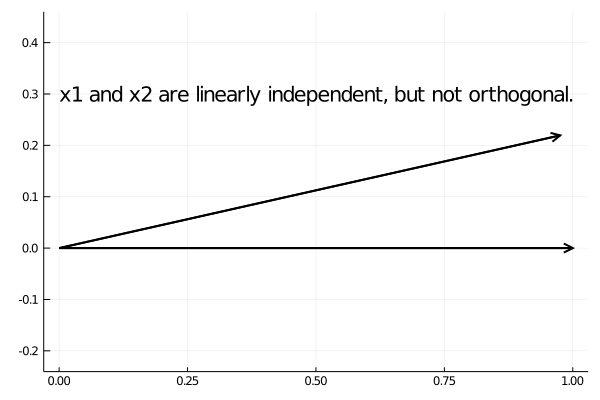

In [22]:
plot([0,x1[1]],[0, x1[2]],arrow=true,color=:black,linewidth=2,aspect_ratio = 1, label="")
plot!([0,x2[1]],[0, x2[2]],arrow=true,color=:black,linewidth=2,label="")
annotate!(0.5,0.3, text("x1 and x2 are linearly independent, but not orthogonal."))

In [23]:
## Ex 3. Symmetric matrix

In [24]:
S = [0.5 0.5 ; 0.5  0.5]

2×2 Matrix{Float64}:
 0.5  0.5
 0.5  0.5

In [25]:
evecs = eigvecs(S)

2×2 Matrix{Float64}:
 -0.707107  0.707107
  0.707107  0.707107

In [26]:
x1 = evecs[:,1]
x2 = evecs[:,2]

2-element Vector{Float64}:
 0.7071067811865475
 0.7071067811865475

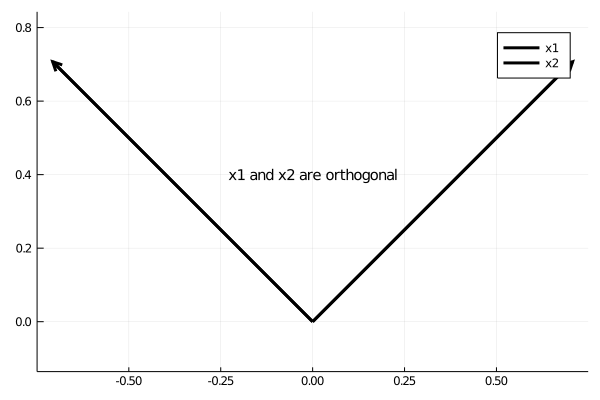

In [27]:
plot([0,x1[1]],[0,x1[2]], arrow =true, linewidth=3, color=:black, aspect_ratio=1, label="x1")
plot!([0,x2[1]],[0,x2[2]], arrow =true, linewidth=3, color=:black, label="x2")
annotate!(0, 0.4, text("x1 and x2 are orthogonal", :black, 10))